# 1. Import Library

In [1]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


#2. Load dataset using pandas

## About dataset: Heart Disease Dataset

*   age
*   sex
*   chest pain type (4 values)
*   resting blood pressure
*   serum cholestoral in mg/dl
*   fasting blood sugar > 120 mg/dl
*   resting electrocardiographic results (values 0,1,2)
*   maximum heart rate achieved
*   exercise induced angina
*   oldpeak = ST depression induced by exercise relative to rest
*   the slope of the peak exercise ST segment
*   number of major vessels (0-3) colored by flourosopy
*   thal: 0 = normal; 1 = fixed defect; 2 = reversable defect




















In [3]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.tail(15)

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1010,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1


#3. Processing data

In [4]:
# convert data to numpy array
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [5]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5. Building a Neural Network

In [7]:
# Define neural network
def create_model():
    model = Sequential([
        Dense(5, activation='tanh', input_shape=(13,)),
        Dense(4, activation='tanh'),
        Dense(3, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    return model

In [8]:
# Define optimizers
optimizers = {
    "SGD": tf.keras.optimizers.legacy.SGD(learning_rate=0.1, momentum=0.9, decay=1e-5),
    "Adam": tf.keras.optimizers.legacy.Adam(learning_rate=0.1, decay=1e-5),
    "RMSprop": tf.keras.optimizers.legacy.RMSprop(learning_rate=0.1, decay=1e-5),
    "AdamW": tfa.optimizers.AdamW(learning_rate=0.1, weight_decay=1e-5),
}

epochs = 50
early_stop_thresh = 5
best_accuracy = -1
best_epoch = -1
accuracies = {optimizer_name: [] for optimizer_name in optimizers}

#6. Train network

In [9]:
for optimizer_name, optimizer in optimizers.items():
    model = create_model()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    for epoch in range(epochs):
        history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=0)
        accuracy = history.history['val_accuracy'][0] * 100

        accuracies[optimizer_name].append(accuracy)

        # Print statistics
        print('Optimizer: {}, Epoch {}/{}, Accuracy: {:.2f}'.format(
            optimizer_name, epoch + 1, epochs, accuracy))

        # Check for best accuracy and early stopping
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_epoch = epoch
            model.save(f"best_model_{optimizer_name}.h5")

        if epoch - best_epoch > early_stop_thresh:
            print(f'{optimizer_name} algorithms stopped training at epoch {epoch}')
            print('\n\n')
            break  # terminate the training loop

Optimizer: SGD, Epoch 1/50, Accuracy: 80.49


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Optimizer: SGD, Epoch 2/50, Accuracy: 78.05
Optimizer: SGD, Epoch 3/50, Accuracy: 82.32
Optimizer: SGD, Epoch 4/50, Accuracy: 82.32
Optimizer: SGD, Epoch 5/50, Accuracy: 81.71
Optimizer: SGD, Epoch 6/50, Accuracy: 83.54
Optimizer: SGD, Epoch 7/50, Accuracy: 85.37
Optimizer: SGD, Epoch 8/50, Accuracy: 85.37
Optimizer: SGD, Epoch 9/50, Accuracy: 84.76
Optimizer: SGD, Epoch 10/50, Accuracy: 85.37
Optimizer: SGD, Epoch 11/50, Accuracy: 87.20
Optimizer: SGD, Epoch 12/50, Accuracy: 82.32
Optimizer: SGD, Epoch 13/50, Accuracy: 87.20
Optimizer: SGD, Epoch 14/50, Accuracy: 89.63
Optimizer: SGD, Epoch 15/50, Accuracy: 87.20
Optimizer: SGD, Epoch 16/50, Accuracy: 89.02
Optimizer: SGD, Epoch 17/50, Accuracy: 88.41
Optimizer: SGD, Epoch 18/50, Accuracy: 89.63
Optimizer: SGD, Epoch 19/50, Accuracy: 88.41
Optimizer: SGD, Epoch 20/50, Accuracy: 90.85
Optimizer: SGD, Epoch 21/50, Accuracy: 90.85
Optimizer: SGD, Epoch 22/50, Accuracy: 90.85
Optimizer: SGD, Epoch 23/50, Accuracy: 91.46
Optimizer: SGD, Ep

#Comparison of optimizer algorithms

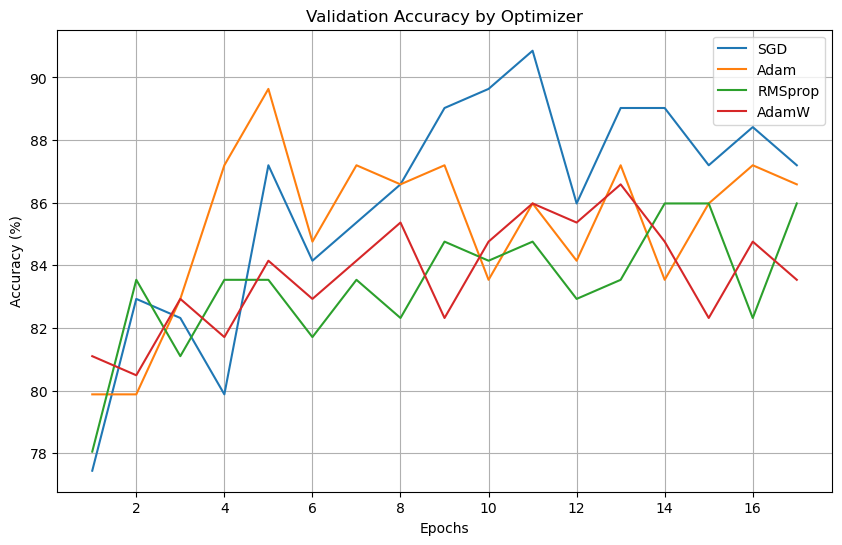

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
for optimizer_name, accuracy in accuracies.items():
    plt.plot(range(1, len(accuracy) + 1), accuracy, label=optimizer_name)
plt.title('Validation Accuracy by Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()